In [ ]:
#importing the basic librairies
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
import scipy
#import unidecode
# Visualization 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import missingno #missing values , deal with text
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import neattext.functions as nfx

import wordcloud

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import itertools

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import re
import string
from sklearn.metrics import classification_report
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### EDA

In [ ]:
df=pd.read_csv("Constraint_English_Train.csv")

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrBr):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
df.head(7)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
5,6,"Covid Act Now found ""on average each person in...",real
6,7,If you tested positive for #COVID19 and have n...,real


In [ ]:
df.shape

(6420, 3)

In [ ]:
df.columns

Index(['id', 'tweet', 'label'], dtype='object')

In [ ]:
df=df.drop(['id'],axis=1)

In [ ]:
df.head(7)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
5,"Covid Act Now found ""on average each person in...",real
6,If you tested positive for #COVID19 and have n...,real


In [ ]:
df["label"].value_counts()

real    3360
fake    3060
Name: label, dtype: int64

In [ ]:
df1 = df.copy(deep=True)

## we put df1 as df with labels 'fake' 'reel' / df with dummy variables

### VIZUALIZATION

#### DUMMY VARIABLES

In [ ]:
#use map to code label : true as 1 / fake as 0
df1['label'] = df1['label'].map({'real': 1,'fake': 0})

In [ ]:
df.head(7)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
5,"Covid Act Now found ""on average each person in...",real
6,If you tested positive for #COVID19 and have n...,real


In [ ]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

In [ ]:
df1.isnull().sum()

tweet    0
label    0
dtype: int64

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
import neattext.functions as nfx

In [ ]:
#let's start first by cleaning the text of the hashtags
#extract the hashtags within the text
df['tweet'].apply(nfx.extract_hashtags)

0                                                      []
1                                                      []
2                              [#coronavirus, #nashville]
3       [#IndiaFightsCorona:, #COVID, #StaySafe, #Indi...
4                                                      []
                              ...                        
6415                                                   []
6416                                                   []
6417                                                   []
6418                                                   []
6419                                                   []
Name: tweet, Length: 6420, dtype: object

In [ ]:
df['tweet'].apply(nfx.remove_urls)

0       The CDC currently reports 99031 deaths. In gen...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID-19 please st...
6416    ???Autopsies prove that COVID-19 is??� a blood...
6417    _A post claims a COVID-19 vaccine has already ...
6418    Aamir Khan Donate 250 Cr. In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df['tweet'].apply(nfx.remove_puncts)

0       The CDC currently reports 99031 deaths In gene...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have 1524 #COVID testin...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID19 please sta...
6416    Autopsies prove that COVID19 is� a blood clot ...
6417    A post claims a COVID19 vaccine has already be...
6418     Aamir Khan Donate 250 Cr In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df['tweet'].apply(nfx.remove_special_characters)

0       The CDC currently reports 99031 deaths In gene...
1       States reported 1121 deaths a small rise from ...
2       Politically Correct Woman Almost Uses Pandemic...
3       IndiaFightsCorona We have 1524 COVID testing l...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID19 please sta...
6416    Autopsies prove that COVID19 is a blood clot n...
6417    A post claims a COVID19 vaccine has already be...
6418     Aamir Khan Donate 250 Cr In PM Relief Cares Fund
6419    It has been 93 days since the last case of COV...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df['tweet'].apply(nfx.remove_numbers)

0       The CDC currently reports  deaths. In general ...
1       States reported  deaths a small rise from last...
2       Politically Correct Woman (Almost) Uses Pandem...
3       #IndiaFightsCorona: We have  #COVID testing la...
4       Populous states can generate large case counts...
                              ...                        
6415    A tiger tested positive for COVID- please stay...
6416    ???Autopsies prove that COVID- is??� a blood c...
6417    _A post claims a COVID- vaccine has already be...
6418       Aamir Khan Donate  Cr. In PM Relief Cares Fund
6419    It has been  days since the last case of COVID...
Name: tweet, Length: 6420, dtype: object

In [ ]:
df["tweet"] = df["tweet"].apply(word_drop)

In [ ]:
df1["tweet"] = df1["tweet"].apply(word_drop)

In [ ]:
df.head(7)

,tweet,label
0,the cdc currently reports deaths in general ...,real
1,states reported deaths a small rise from last...,real
2,politically correct woman almost uses pandem...,fake
3,indiafightscorona we have covid testing la...,real
4,populous states can generate large case counts...,real
5,covid act now found on average each person in...,real
6,if you tested positive for and have no sympt...,real


In [ ]:
df1.head(7)

,tweet,label
0,the cdc currently reports deaths in general ...,1
1,states reported deaths a small rise from last...,1
2,politically correct woman almost uses pandem...,0
3,indiafightscorona we have covid testing la...,1
4,populous states can generate large case counts...,1
5,covid act now found on average each person in...,1
6,if you tested positive for and have no sympt...,1


### Defining dependent and independent variable as x and y

In [ ]:
x = df["tweet"]
y = df["label"]

In [ ]:
x1 = df1["tweet"]
y1 = df1["label"]

### Splitting the dataset into training set and testing set.

In [ ]:
# we put the test size at 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Convert text to vectors
- MATRIX TF-IDF / count words

=> First, we have built our baseline model with a count vectorizer. Count vectorizer converts the text document to a vector of token counts. 

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

accuracy:   0.910
Confusion matrix, without normalization


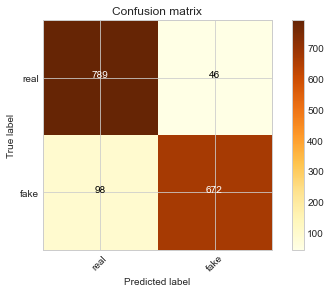

In [ ]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['real' , 'fake'])
plot_confusion_matrix(cm, classes=['real', 'fake'])

accuracy:   0.928
Confusion matrix, without normalization


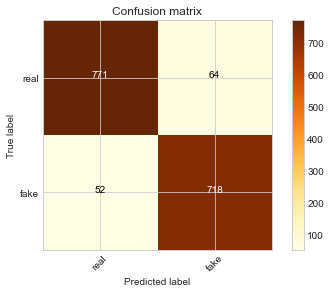

In [ ]:
LR = LogisticRegression()
LR.fit(count_train, y_train)
pred = LR.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['real' , 'fake'])
plot_confusion_matrix(cm, classes=['real', 'fake'])

accuracy:   0.920
Confusion matrix, without normalization


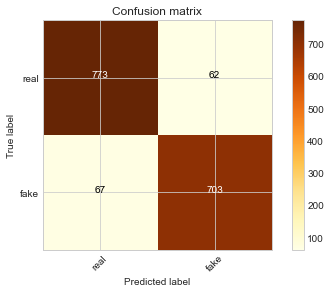

In [ ]:
pac = PassiveAggressiveClassifier()
pac.fit(count_train, y_train)
pred = pac.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['real' , 'fake'])
plot_confusion_matrix(cm, classes=['real', 'fake'])

- To improve the performance of our machine learning algorithms we have used the TFIDF vectorizer. TFIDF vectorizer converts the text document into a matrix of TFIDF features. 
- Now let’s talk about its hyper-parameter first one is stopwords which is defined for making aware that stopwords used in the text are of English language, max_df is used for removing terms that appear too frequently, In our case, we have taken its value as 0.8 which means remove those words which appear in more than 80% of the documents and the last hyper-parameter is ngram_range which is set as (1,2) i.e., it will allow both unigrams and bigrams.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer.transform(x_test)

accuracy:   0.903
Confusion matrix, without normalization


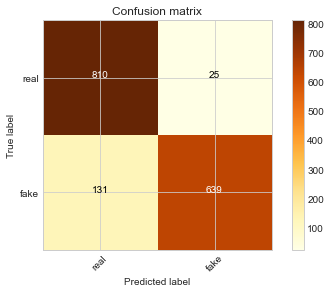

In [ ]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['real', 'fake'])
plot_confusion_matrix(cm, classes=['real', 'fake'])

accuracy:   0.941
Confusion matrix, without normalization


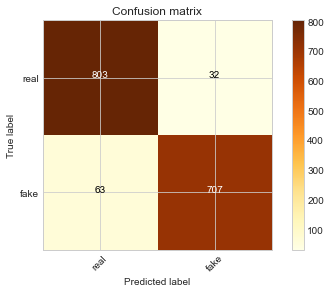

In [ ]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['real', 'fake'])
plot_confusion_matrix(cm, classes=['real', 'fake'])

accuracy:   0.921
Confusion matrix, without normalization


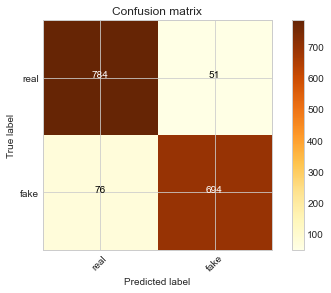

In [ ]:
log_tf = LogisticRegression()
log_tf.fit(tfidf_train_2, y_train)
pred = log_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['real', 'fake'])
plot_confusion_matrix(cm, classes=['real', 'fake'])

In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

,aadajoli,aaiofficial,aaj,aajtak,aamaadmiparty,aamctoday,aamir,ababa,abacha,abakaliki,...,दह,बरय,बह,वध,ಡನ,ನಗಳಲ,張展,監獄絕食抗議,被監視居住,陳秋實
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)

In [ ]:
most_informative_feature_for_binary_classification(tfidf_vectorizer, pass_tf, n=30)

fake -4.76673345943678 coronavirus
fake -4.525024651000161 covid
fake -4.017697904209124 news
fake -3.2602386307826885 trump
fake -2.9720689093783625 corona
fake -2.2828601276256273 claim
fake -2.1223562817543735 virus
fake -2.103057464407433 lockdown
fake -2.074374259330692 coronavirusfacts
fake -2.016852107380097 president
fake -1.845090862920686 false
fake -1.8037887462674993 fact
fake -1.7676623534465747 pandemic
fake -1.7496260696627828 said
fake -1.716487945679415 claims
fake -1.7078714647471425 china
fake -1.7047716217045263 man
fake -1.693907017305603 realdonaldtrump
fake -1.6927766256830237 video
fake -1.6678206014868442 cure
fake -1.6447898054534424 government
fake -1.6421524373912173 masks
fake -1.6012330570579463 factcheck
fake -1.5974222793681832 coronavirusfacts https
fake -1.538106925260448 gates
fake -1.5258266225486306 indian
fake -1.4715335285264612 wuhan
fake -1.4583594630591323 guide
fake -1.4362821627092213 gt
fake -1.4165247775479268 misinformation

real 8.2852466

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.75)

In [ ]:
#vectorization = TfidfVectorizer(stop_words='english',max_df=0.75)
xv_train = tfidf_vectorizer.fit_transform(x_train.values.astype('U'))
xv_test = tfidf_vectorizer.transform(x_test.values.astype('U'))

'''
TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. 
A higher value means a term appears more often than others, and so, the document is a good match 
when the term is part of the search terms.

IDF (Inverse Document Frequency): Words that occur many times a document,
but also occur many times in many others, may be irrelevant. IDF is a measure of how significant
a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.
'''

'\nTF (Term Frequency): The number of times a word appears in a document is its Term Frequency. \nA higher value means a term appears more often than others, and so, the document is a good match \nwhen the term is part of the search terms.\n\nIDF (Inverse Document Frequency): Words that occur many times a document,\nbut also occur many times in many others, may be irrelevant. IDF is a measure of how significant\na term is in the entire corpus.\n\nThe TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.\n'

### 1. Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)
score = LR.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.52%


In [ ]:
#Build a text report showing the main classification metrics. 
#note : A revoir en detaillant 
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        fake       0.92      0.93      0.92       770
        real       0.93      0.92      0.93       835

    accuracy                           0.93      1605
   macro avg       0.93      0.93      0.93      1605
weighted avg       0.93      0.93      0.93      1605



## 2. Naive BAYES => MULTINOMIALNB

In [ ]:
#Naive Bayes classifier for multinomial models
#The multinomial Naive Bayes classifier is suitable for classification with discrete features 
#(e.g., word counts for text classification).

#Train Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
MB =MultinomialNB()
MB.fit(xv_train,y_train)

MultinomialNB()

In [ ]:
pred_MB=MB.predict(xv_test)

In [ ]:
score = MB.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 90.47%


In [ ]:
print(classification_report(y_test, pred_MB))

              precision    recall  f1-score   support

        fake       0.95      0.85      0.89       770
        real       0.87      0.96      0.91       835

    accuracy                           0.90      1605
   macro avg       0.91      0.90      0.90      1605
weighted avg       0.91      0.90      0.90      1605



## 3. KNN

In [ ]:
#add range of k
KNN = KNeighborsClassifier(n_neighbors=12)
KNN.fit(xv_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
pred_KNN=KNN.predict(xv_test)

In [ ]:
score = KNN.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 89.35%


In [ ]:
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

        fake       0.90      0.88      0.89       770
        real       0.89      0.91      0.90       835

    accuracy                           0.89      1605
   macro avg       0.89      0.89      0.89      1605
weighted avg       0.89      0.89      0.89      1605



## 4. PassiveAggressiveClassifier

##### What is a PassiveAggressiveClassifier?
- Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

- A revoir

In [ ]:
pac=PassiveAggressiveClassifier()
pac.fit(xv_train,y_train)

PassiveAggressiveClassifier()

In [ ]:
pred_pac=pac.predict(xv_test)

In [ ]:
score = pac.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.33%


In [ ]:
print(classification_report(y_test, pred_pac))

              precision    recall  f1-score   support

        fake       0.94      0.92      0.93       770
        real       0.92      0.95      0.94       835

    accuracy                           0.93      1605
   macro avg       0.93      0.93      0.93      1605
weighted avg       0.93      0.93      0.93      1605



In [ ]:
confusion_matrix(y_test,pred_pac)

array([[705,  65],
       [ 42, 793]], dtype=int64)

### So with this model
- we have 700 true positives,
- 796 true negatives,
- 50 false positives, 
- and 59 false negatives.

![image.png](attachment:image.png)

### CONCLUSION
- this is the best model with an accuracy of 93,21%

In [ ]:
X= vectorization.fit_transform(df['tweet'].astype('U'))

NameError: name 'vectorization' is not defined

In [ ]:
#We set for K-Fold equal to k=5 folds
print("PAC")
scores = cross_val_score(pac, X, df["label"].values,cv=5)
print(f'the accuracy of K-Fold: {round(scores.mean()*100,2)}%')

In [ ]:
#We set for K-Fold equal to k=5 folds
print("LR")
scores = cross_val_score(LR, X, df["label"].values,cv=5)
print(f'the accuracy of K-Fold: {round(scores.mean()*100,2)}%')

In [ ]:
#We set for K-Fold equal to k=5 folds
print("KNN")
scores = cross_val_score(KNN, X, df["label"].values,cv=5)
print(f'the accuracy of K-Fold: {round(scores.mean()*100,2)}%')

In [ ]:
#We set for K-Fold equal to k=5 folds
print("MB")
scores = cross_val_score(MB, X, df["label"].values,cv=5)
print(f'the accuracy of K-Fold: {round(scores.mean()*100,2)}%')

### TEST THE BEST MODEL => PAC

In [ ]:
df_test = pd.read_csv("Constraint_English_Test.csv")

In [ ]:
df_test.head(7)

In [ ]:
df_test=df_test.drop(['id'],axis=1)

In [ ]:
df_test.head(7)

In [ ]:
df_test["label"].value_counts()

In [ ]:
#use map to code label : true as 1 / fake as 0
df_test['label'] = df_test['label'].map({'real': 1,'fake': 0})

In [ ]:
df_test.head(7)

In [ ]:
def findlabel(newtext):
    vec_newtest=tfidf_vectorizer.transform([newtext])
    y_pred1=pac.predict(vec_newtest)
    return y_pred1[0]

In [ ]:
findlabel((df_test['tweet'][0]))
findlabel(('corona isjust a conspiracy , it s not true ')) 
#0 => fake
#1 => true

In [ ]:
df['tweet'].size
len(df_test['tweet'])

In [ ]:
sum([1 if findlabel((df_test['tweet'][i]))== 1 else 0 for i in range(len(df_test['tweet']))])/len(df_test['tweet'])

In [ ]:
sum([1 if findlabel((df_test['tweet'][i]))== 0 else 0 for i in range(len(df_test['tweet']))])/df['tweet'].size